<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/lotto_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM_Keras_Tesla

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow import set_random_seed
from sklearn.metrics import accuracy_score


Using TensorFlow backend.


In [2]:
set_random_seed(42)
np.random.seed(42)
df = pd.read_csv('https://raw.githubusercontent.com/douglasbarbosadelima/Data-Science/master/sum-lotto.csv')

df

,Sum
0,215
1,193
2,220
3,231
4,233
...,...
253,254
254,214
255,174
256,230


In [3]:
df['d1']=0.0
df['d2']=0.0
df['d3']=0.0
df['d4']=0.0
df['target']=0.0

df.head(), df.shape

(   Sum   d1   d2   d3   d4  target
 0  215  0.0  0.0  0.0  0.0     0.0
 1  193  0.0  0.0  0.0  0.0     0.0
 2  220  0.0  0.0  0.0  0.0     0.0
 3  231  0.0  0.0  0.0  0.0     0.0
 4  233  0.0  0.0  0.0  0.0     0.0, (258, 6))

In [4]:
for i in range(len(df) - 5):
  df.iloc[i,1]=df.iloc[i+1,0]
  df.iloc[i,2]=df.iloc[i+2,0]
  df.iloc[i,3]=df.iloc[i+3,0]
  df.iloc[i,4]=df.iloc[i+4,0]
  df.iloc[i,5]=df.iloc[i+5,0]

print(df.head())
ndf=df[:len(df) - 5].copy()
y=np.array(ndf['target'])
ndf=ndf.drop(columns='target',axis=1)
X=np.array(ndf)
print(X.shape)
print(X[:3])
X=X[:,:,np.newaxis]

   Sum     d1     d2     d3     d4  target
0  215  193.0  220.0  231.0  233.0   182.0
1  193  220.0  231.0  233.0  182.0   138.0
2  220  231.0  233.0  182.0  138.0   216.0
3  231  233.0  182.0  138.0  216.0   140.0
4  233  182.0  138.0  216.0  140.0   143.0
(253, 5)
[[215. 193. 220. 231. 233.]
 [193. 220. 231. 233. 182.]
 [220. 231. 233. 182. 138.]]


In [5]:
model = Sequential()
model.add(LSTM(30, activation='relu', input_shape=(5, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=10000, verbose=1)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10000





253/253 [==============================] - 1s 2ms/step - loss: 45205.1642
Epoch 2/10000
253/253 [==============================] - 0s 152us/step - loss: 39367.3124
Epoch 3/10000
253/253 [==============================] - 0s 147us/step - loss: 34858.4536
Epoch 4/10000
253/253 [==============================] - 0s 145us/step - loss: 25306.9298
Epoch 5/10000
253/253 [==============================] - 0s 145us/step - loss: 14465.8105
Epoch 6/10000
253/253 [==============================] - 0s 175us/step - loss: 3135.1736
Epoch 7/10000
253/253 [==============================] - 0s 168us/step - loss: 1981.1063
Epoch 8/10000
253/253 [==============================] - 0s 157us/step - loss: 2125.1035
Epoch 9/10000
253/253 [==============================] - 0s 154us/step - loss: 2007.0486
Epoch 10/10000
253/253 [==============================] - 0s 145us/step - loss: 1991.6008


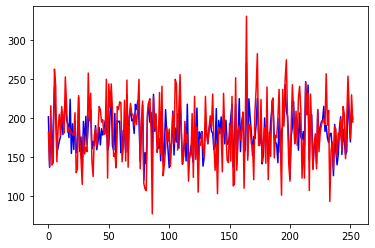

(257.0, array([190.70961], dtype=float32))

In [8]:
ye = model.predict(X)
import matplotlib.pyplot as plt
plt.plot(ye, color='blue')
plt.plot(y, color='red')
plt.show()

y[230], ye[230] # estimate nth day.

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30)                3840      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 3,871
Trainable params: 3,871
Non-trainable params: 0
_________________________________________________________________
